In [1]:
# Linear Regression
#  y = M x + b

from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

In [3]:
# using formula
def best_fit_slope_and_intercept(xs,ys):
    m = ( ( mean(xs) * mean(ys) - mean(xs * ys)) / 
           ( (mean(xs)**2) - mean(xs**2)) )
    b = mean(ys) - m* mean(xs)
    return m, b

In [14]:
# create random dataset with adjustable variance to test
def create_dataset( hm, variance, step=2, correlation = False):
    val =1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-= step
        xs = [i for i in range(len(ys))]
    return np.array(xs, dtype= np.float64), np.array(ys, dtype = np.float64)

In [22]:
# change in variance affects coeff of determination
xs, ys = create_dataset( 40 , 40, 2 , correlation='pos')

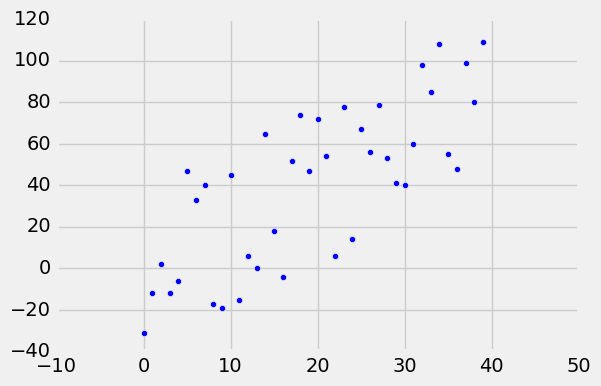

In [33]:
#xs = np.array([ 1, 2, 4, 2, 1, 4 ,4], dtype = np.float64 )
#ys = np.array([ 4, 5, 2, 5, 2, 4, 5], dtype = np.float64 )
plt.scatter(xs,ys)
plt.show()

In [23]:
xs


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.])

In [24]:
ys

array([ -31.,  -12.,    2.,  -12.,   -6.,   47.,   33.,   40.,  -17.,
        -19.,   45.,  -15.,    6.,    0.,   65.,   18.,   -4.,   52.,
         74.,   47.,   72.,   54.,    6.,   78.,   14.,   67.,   56.,
         79.,   53.,   41.,   40.,   60.,   98.,   85.,  108.,   55.,
         48.,   99.,   80.,  109.])

In [27]:
# calling the function 
m,b = best_fit_slope_and_intercept(xs, ys)
print(m , b)

2.52917448405 -8.94390243902


In [28]:
#formula for regression line  
#(gives a list of y values on the line for corresponding xs)
regression_line = [ (m*x) + b for x in xs] 


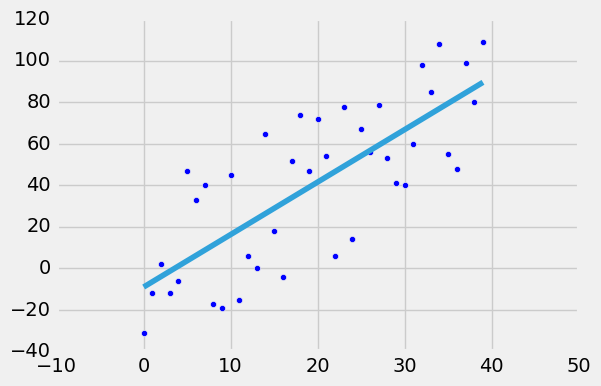

In [29]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [31]:
# TEST
# accuracy uses squared error so deal with positive
# r**2 = 1 - mean(best fit)/ mean(ys) 
 
def squared_error(ys_orig, ys_line):
    return sum( (ys_line - ys_orig) **2)

# how well the line fits the data
def coeff_of_det(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/ squared_error_y_mean)

In [32]:
coeff = coeff_of_det(ys, regression_line)
print(coeff)

0.580358469332


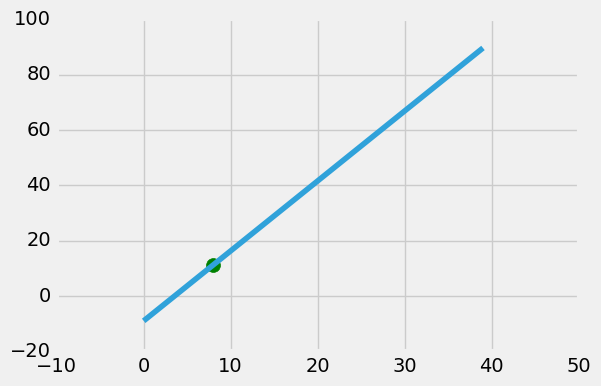

In [30]:
# PREDICT
predict_x = 8
predict_y = (m * predict_x) + b 

# prediction lies on the line
plt.plot(xs, regression_line)

plt.scatter(predict_x, predict_y, s=100, color = 'g')
plt.show()